## Regresión Logistica y Random Forest
### Ignacio Castro
### Sergio Pacheco

## Dataset

In [1]:
#Cargar dataset
import pandas as pd
df = pd.read_csv('data.csv')
print(df.shape)
df.head(4)

(1590, 12)


,Unnamed: 0,id,country,media_outlet,url,title,text,date,year,id_journalist,temas,target_topic
0,14886,625601,chile,biobiochile,https://www.biobiochile.cl/noticias/internacio...,Informe del Congreso de EEUU apunta a Boeing y...,Una investigación del Congreso de Estados Unid...,2020-09-16,2020.0,NaN,internacional,Catástrofes y Accidentes
1,19882,38140,chile,biobiochile,https://www.biobiochile.cl/noticias/nacional/c...,Fin de año y todo el verano bajo E. de Catástr...,"Así, Chile pasará Navidad, Año Nuevo y todo el...",2020-12-03,2020.0,NaN,nacional,Catástrofes y Accidentes
2,668,7047570,chile,latercera,https://www.latercera.com/mouse/fue-un-acciden...,Fue un accidente: Shūeisha justificó que un ed...,El historial de navegación de una persona pued...,2021-01-14,2021.0,NaN,mouse,Catástrofes y Accidentes
3,7946,4712271,chile,latercera,https://www.latercera.com/nacional/noticia/acc...,Accidentes de tránsito: uno de cada cinco fall...,Más de dos mil accidentes han involucrado este...,2020-11-13,2020.0,NaN,nacional,Catástrofes y Accidentes


In [2]:
# Columnas importantes
data = df[['title', 'text', 'target_topic']]
data

,title,text,target_topic
0,Informe del Congreso de EEUU apunta a Boeing y...,Una investigación del Congreso de Estados Unid...,Catástrofes y Accidentes
1,Fin de año y todo el verano bajo E. de Catástr...,"Así, Chile pasará Navidad, Año Nuevo y todo el...",Catástrofes y Accidentes
2,Fue un accidente: Shūeisha justificó que un ed...,El historial de navegación de una persona pued...,Catástrofes y Accidentes
3,Accidentes de tránsito: uno de cada cinco fall...,Más de dos mil accidentes han involucrado este...,Catástrofes y Accidentes
4,Hombre de 57 años muere tras accidente en Quel...,Como José Huirimilla fue identificada la perso...,Catástrofes y Accidentes
...,...,...,...
1585,Figueroa y vuelta a clases: sostenedores que s...,"El ministro de Educación, Raúl Figueroa, reit...",Salud
1586,Paris por liberación de correos electrónicos a...,"El ministro de Salud, Enrique Paris, declinó ...",Salud
1587,La empresa Pfizer anuncia que su vacuna antico...,La farmacéutica estadounidense Pfizer anunció ...,Salud
1588,Presidente Piñera pide a Corte Suprema desesti...,"Los abogados del Presidente Sebastián Piñera,...",Salud


1- Mundo, 2- Economía, 3- Política y Conflictos, 4- Ciencias y Tecnología, 5- Catástrofes y Accidentes, 6- Cultura y Artes, 7- Deporte, 8- Ecología y Planeta, 9- Crimen, delitos y Justicia, 10- Salud

### Distribución de datos

In [3]:
data.target_topic.value_counts()

Catástrofes y Accidentes      159
Ciencias y Tecnologia         159
Crimen, delitos y justicia    159
Cultura y Artes               159
Deporte                       159
Ecologia                      159
Economia                      159
Mundo                         159
Politica y Conflictos         159
Salud                         159
Name: target_topic, dtype: int64

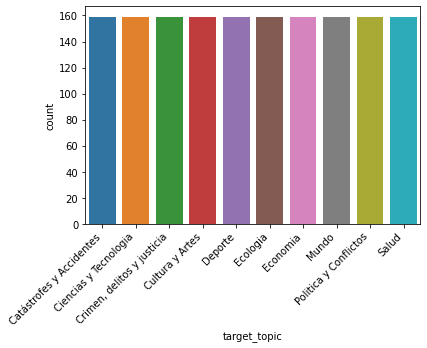

In [4]:
#Esta es la visualizacion en grafico de barras del dataset completo
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
chart = sns.countplot(data.target_topic)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
None

In [5]:
#la version anterior tenia 308 noticias por topico, 
#pero decidimos reducir el numero para elegir noticias más relevantes al tema y mejorar la calidad.
data_final = data.groupby('target_topic').sample(n=159, random_state=2)
#Se crear un dataset con cantidad igual de cada topico
data_final.target_topic.value_counts()

Catástrofes y Accidentes      159
Ciencias y Tecnologia         159
Crimen, delitos y justicia    159
Cultura y Artes               159
Deporte                       159
Ecologia                      159
Economia                      159
Mundo                         159
Politica y Conflictos         159
Salud                         159
Name: target_topic, dtype: int64

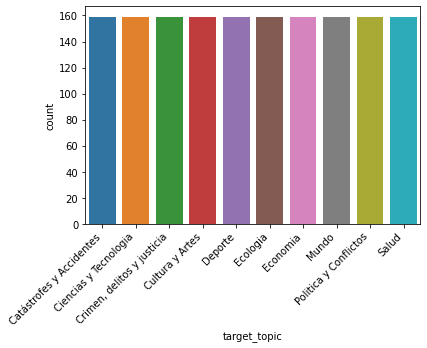

In [6]:
#Esta seria la visualizacion despues de equilibrar, si no viniera equilibrado desde antes.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
chart = sns.countplot(data_final.target_topic)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
None

In [7]:
#Utilizamos el dataset con igual cantidad de cada topico
data = data_final

### Label encoding

In [8]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['topic_num']= label_encoder.fit_transform(data['target_topic']) 

In [9]:
data

,title,text,target_topic,topic_num
12,Camila Recabarren revela que sufrió accidente ...,"Hace un par de días, Camila Recabarren viajó a...",Catástrofes y Accidentes,0
3,Accidentes de tránsito: uno de cada cinco fall...,Más de dos mil accidentes han involucrado este...,Catástrofes y Accidentes,0
153,Asaltante protagoniza accidente de tránsito qu...,"Durante la jornada de este miércoles, Carabine...",Catástrofes y Accidentes,0
6,Dos accidentes se registran en Ruta 5 Sur ante...,"La mañana de este jueves, cerca de las 08:30 h...",Catástrofes y Accidentes,0
129,Fatal accidente deja un fallecido y un joven e...,"La madrugada de este sábado, un conductor muri...",Catástrofes y Accidentes,0
...,...,...,...,...
1432,CureVac asegura positivos datos preclínicos pa...,La compañía biotecnológica alemana CureVac dij...,Salud,9
1489,EE.UU. lanza nuevo estudio que usa tres fármac...,El Gobierno de EE.UU. lanzó este viernes un en...,Salud,9
1579,Abogado de Mañalich prepara querella contra ex...,"El abogado de Jaime Mañalich, Gabriel Zaliasn...",Salud,9
1552,Bono Clase Media: 15 mil personas devolvieron ...,El Servicio de Impuestos Internos (SII) infor...,Salud,9


## Preprocesamiento

### Parsear texto

In [10]:
#Removemos elementos sin significado.
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('spanish')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [11]:
data['text_parsed'] = data['text'].apply(process_text)

### Partición de los datos

In [12]:
from sklearn.model_selection import train_test_split

X = data['text_parsed'] # lo que se quiere analizar
ylabels = data['topic_num'] # etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3) #split para test/train

In [13]:
from spacy.lang.es import Spanish


# Puntuacion
punctuations = [".",",","!","?", ")","(","#","&"," ", ":", "'", "$", "/",'"', "}","{", ";"]

# Importamos lista de stopwords
stop_words = set(stopwords.words('spanish'))

# Tokenizador
parser = Spanish()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [word.lower_ for word in mytokens]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens

#### Vectorización de los textos en BoW o TF-IDF, con scikit-learn

In [14]:
#Vectorizamos
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

## Entrenamiento 

In [15]:
from sklearn.linear_model import LogisticRegression # Regresion Logística
from sklearn.pipeline import Pipeline

# Clasificador
modelLR = LogisticRegression(random_state = 42, multi_class = 'ovr', class_weight=None, max_iter=1000)

# Pipeline
model1 = Pipeline([('preprocessing', bow_vector),
                 ('regression-ML', modelLR)])

# Modelos
model1.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fa2e1b08a70>)),
                ('regression-ML',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

In [16]:
modelLR = LogisticRegression(random_state = 42, multi_class = 'ovr', class_weight=None, max_iter=1000)

model2 = Pipeline([('preprocessing', tfidf_vector),
                 ('regression-ML', modelLR)])

model2.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7fa2e1b08a70>)),
                ('regression-ML',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

In [17]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=0)

model3 = Pipeline([('preprocessing', bow_vector),
                 ('regression-ML', modelRF)])

model3.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fa2e1b08a70>)),
                ('regression-ML', RandomForestClassifier(random_state=0))])

In [18]:
modelRF = RandomForestClassifier(random_state=0)
model4 = Pipeline([('preprocessing', tfidf_vector),
                 ('regression-ML', modelRF)])

model4.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7fa2e1b08a70>)),
                ('regression-ML', RandomForestClassifier(random_state=0))])

# Evaluación modelo 

### Regresion logistica BOW

Accuracy:  0.779874213836478
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.82      0.80      0.81        50
           2       0.62      0.54      0.58        48
           3       0.98      0.89      0.93        47
           4       0.80      0.90      0.85        49
           5       0.82      0.94      0.88        49
           6       0.71      0.67      0.69        52
           7       0.73      0.70      0.71        46
           8       0.73      0.97      0.84        39
           9       0.76      0.57      0.65        54

    accuracy                           0.78       477
   macro avg       0.78      0.79      0.78       477
weighted avg       0.78      0.78      0.78       477



<AxesSubplot:xlabel='topic_num', ylabel='row_0'>

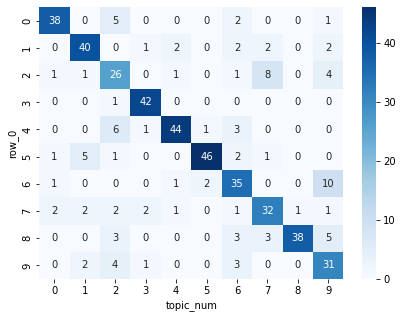

In [19]:
# Predicciones con el dataset.
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

predicted = model1.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
confusion_matrix = pd.crosstab(predicted, y_test)

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

Para comenzar, la regresion logistica con bag of words tiene en general un buen desempeño. El tema de peor desempeño fue 2 (crimen), lo que se podria explicar porque es uno de los temas donde faltaron topicos y se tubo que recurrir a palabras clave, y su dependencia en estas produce bajo recall.

### Regresión logistica TF-IDF

Accuracy:  0.8050314465408805
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.84      0.74      0.79        50
           2       0.80      0.58      0.67        48
           3       0.92      0.98      0.95        47
           4       0.92      0.92      0.92        49
           5       0.82      0.96      0.89        49
           6       0.70      0.75      0.72        52
           7       0.82      0.78      0.80        46
           8       0.76      0.95      0.84        39
           9       0.63      0.61      0.62        54

    accuracy                           0.81       477
   macro avg       0.81      0.81      0.81       477
weighted avg       0.81      0.81      0.80       477



<AxesSubplot:xlabel='topic_num', ylabel='row_0'>

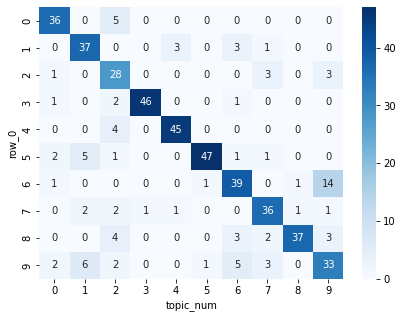

In [20]:
from sklearn.metrics import accuracy_score, classification_report

predicted = model2.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
confusion_matrix = pd.crosstab(predicted, y_test)


fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

Comparados con RL-BOW, el mayor aumento del f1-score se produce 4(deporte). Esto podria indicar que en noticias deportivas hayan ciertas palabras que tambien son comunes en otras pero se repiten más. Por ejemplo si alguien dice "partido" podría ser una articulo de politica, pero si se repite varias veces es que estan hablando de partidos de futbol por ejemplo. En general su desempeño fue similar.

### Random Forest BOW

Accuracy:  0.7672955974842768
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        43
           1       0.82      0.66      0.73        50
           2       0.76      0.58      0.66        48
           3       0.98      0.89      0.93        47
           4       0.72      1.00      0.84        49
           5       0.85      0.94      0.89        49
           6       0.75      0.63      0.69        52
           7       0.78      0.70      0.74        46
           8       0.76      0.95      0.84        39
           9       0.53      0.59      0.56        54

    accuracy                           0.77       477
   macro avg       0.78      0.77      0.77       477
weighted avg       0.77      0.77      0.76       477



<AxesSubplot:xlabel='topic_num', ylabel='row_0'>

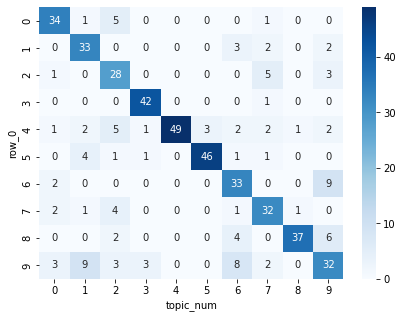

In [21]:
from sklearn.metrics import accuracy_score, classification_report

predicted = model3.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
confusion_matrix = pd.crosstab(predicted, y_test)

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

En general tiene peor desempeño que la regresion logistica, esto podría ser porque el bosque hereda debilidades del arbol de decision. Como las solución esta basada en el optimo local de cada nodo, y la clasificación de texto involucra multiples factores y vectores de palabras, puede que el bosque tenga problemas al clasificar, o se sobreajusten los arboles de manera que no se pueda compensar con el bosque.

### Random Forest TF-IDF

Accuracy:  0.7568134171907757
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.76      0.68      0.72        50
           2       0.72      0.48      0.57        48
           3       1.00      0.83      0.91        47
           4       0.72      0.98      0.83        49
           5       0.81      0.96      0.88        49
           6       0.78      0.67      0.72        52
           7       0.78      0.67      0.72        46
           8       0.68      0.97      0.80        39
           9       0.60      0.59      0.60        54

    accuracy                           0.76       477
   macro avg       0.76      0.76      0.75       477
weighted avg       0.76      0.76      0.75       477



<AxesSubplot:xlabel='topic_num', ylabel='row_0'>

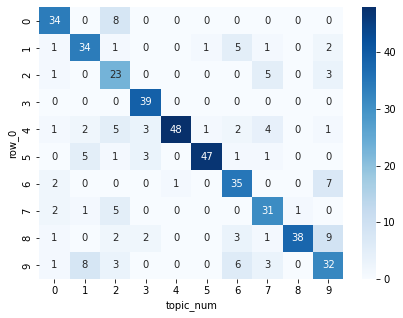

In [22]:
from sklearn.metrics import accuracy_score, classification_report

predicted = model4.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
confusion_matrix = pd.crosstab(predicted, y_test)

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

En este caso, considerar las frecuencias empeora al resultado del random forest. Entonces puede que las frecuencias simplemente no afecte al arbol o incluso que confunda más al modelo, al complicar la clasificación en los nodos de los arboles.

In [23]:
import pickle
pickle.dump(model1, open("ICSP-RL-BOW-V2", 'wb'))
pickle.dump(model2, open("ICSP-RL-IDF-V2", 'wb'))
pickle.dump(model3, open("ICSP-RF-BOW-V2", 'wb'))
pickle.dump(model4, open("ICSP-RF-IDF-V2", 'wb'))